<a href="https://colab.research.google.com/github/TanishqThuse/AIML_Weather_Prediction_Model/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

I am using Linear Regression algorithm for predicative weather analysis

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AIML_Codes/weather.csv")
#print(dataset.shape)

In [ ]:
print(df.shape)


(366, 22)


In [ ]:
print(df.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

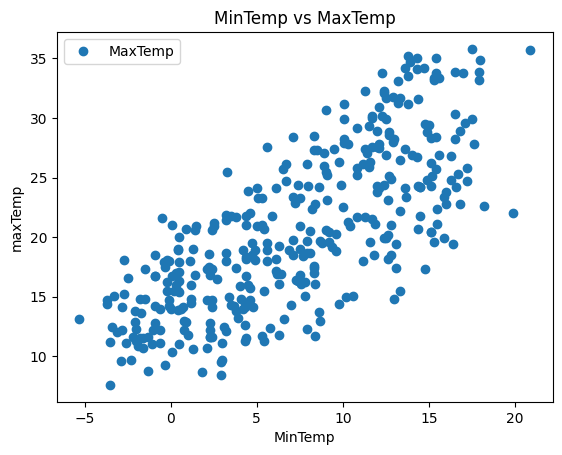

In [ ]:
#We are plotting and seeing relationship in a 2D plot
df.columns=df.columns.str.strip()
#The above code is for trimming the string
df.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('maxTemp')
plt.show()

<ipython-input-33-aaabbe8e414a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seabornInstance.distplot(df['MaxTemp'])


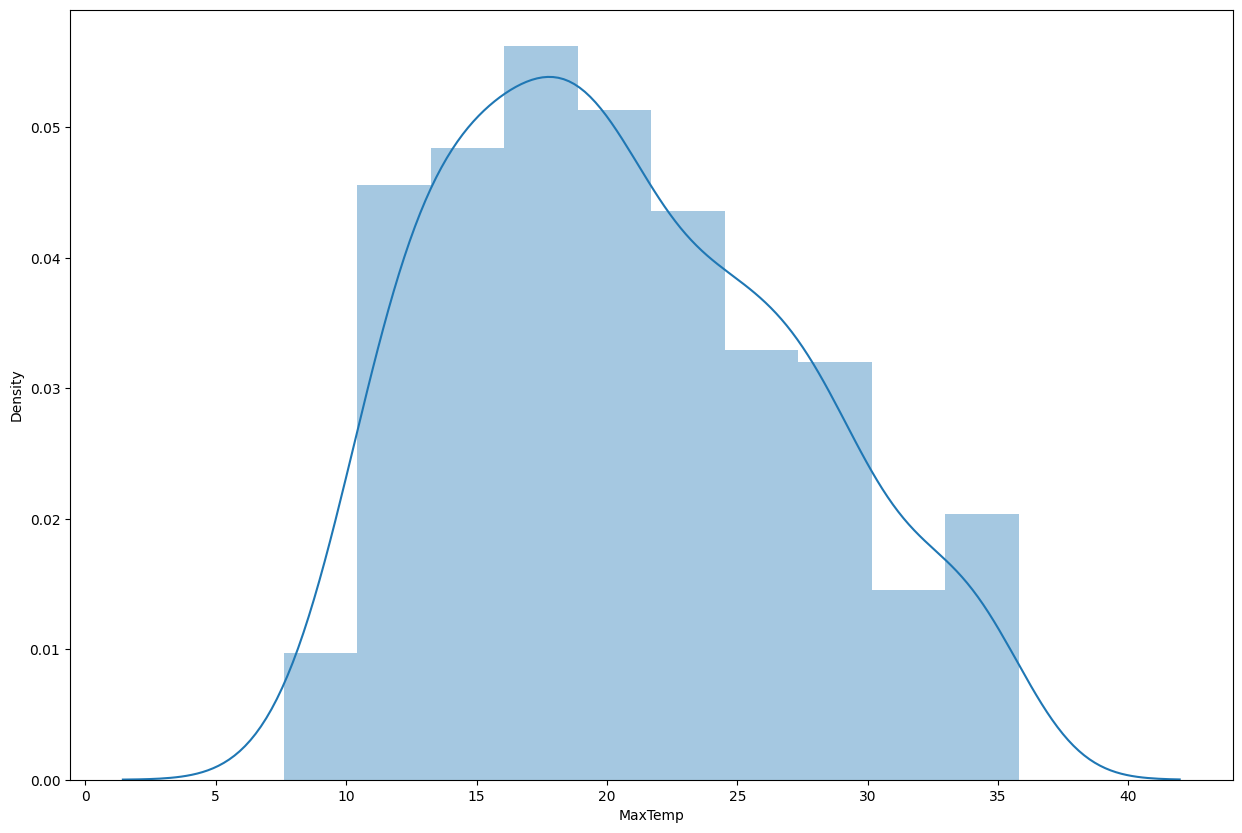

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['MaxTemp'])
plt.show()
#The only thing i did this is to understand that my average temp is between 15 & 20

In [ ]:
#we gonna do something ike data splicing
#it basically is splitting data in training and testing data
x = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values.reshape(-1,1)

after splitting data into trainign and testing data imma just gonna deal with MinTemp and MaxTemp

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
regressor = LinearRegression()
#we import LR class and create instance
regressor.fit(x_train, y_train) #training algorithm

LinearRegression()

In [ ]:
#To retrive the intercept
print('Intercept:',regressor.intercept_)
print('Coefficient',regressor.coef_)
#I don't understand wtf does the below values mean but it looks cool

Intercept: [14.56202411]
Coefficient [[0.81953755]]


Edit : So basically we use concept of maths of straight lines in JEE
i.e, intercept is just where we hit upon the axis and coefficient also makes sense with jee concepts[link text](https://)

Coefficient is nothing but Beta values

In [ ]:
#now we gotta test
y_pred = regressor.predict(x_test)
#I kinda messed up inn names lol do naming it data_frame
data_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted':y_pred.flatten()})
print(data_frame)

    Actual  Predicted
0     25.2  23.413030
1     11.5  13.086857
2     21.1  27.264856
3     22.2  25.461874
4     20.4  26.937041
..     ...        ...
69    18.9  20.216833
70    22.8  27.674625
71    16.1  21.446140
72    25.1  24.970151
73    12.2  14.070302

[74 rows x 2 columns]


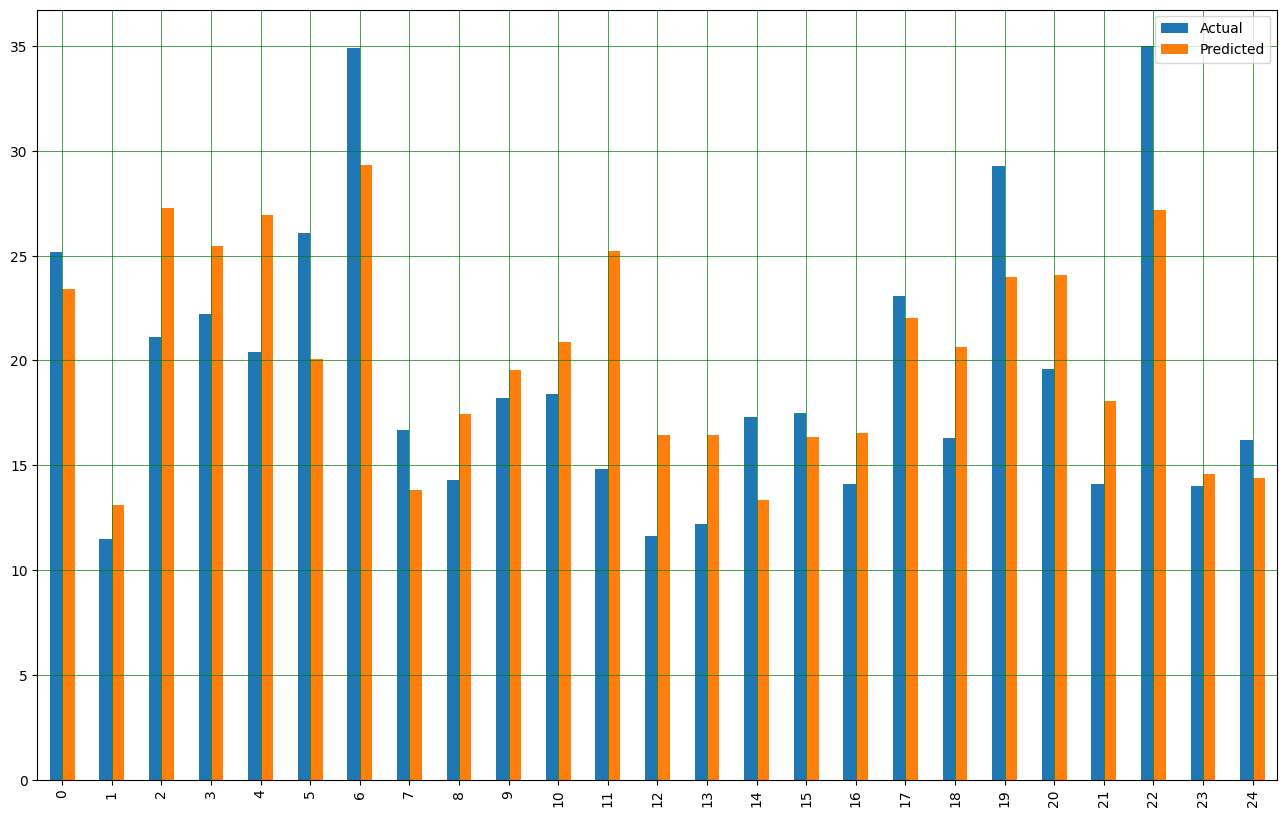

In [ ]:
#now let's use a plot
#since i am freaked up in naming i am going to use df1 for simplicity
df1 = data_frame.head(25)
df1.plot(kind = 'bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

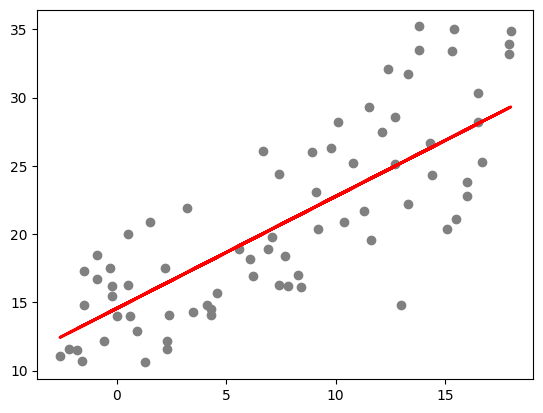

In [ ]:
#the straight line shows the linear relationship
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
#the final step is to evaluate the performance of the algorithm
#how well different algorithms perform
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#the sklearn library comes with pre-built fucntions that does all math


Mean Absolute Error: 3.5094353112899594
Mean Squared Error: 17.011877668640622
Root Mean Squared Error: 4.124545753006096


Y = Ba + B1X + e